# Spotify Analysis
__I have downloaded my Spotify data that goes from March 2015 to July 2025__ <br>
__Here I will show my process of cleaning the data and analysing it for insights and intruiging data to me__ <br><br>
This data shows _every_ stream, regardless of how long the stream was. <br>
I will only be analysing data from streams that last more than 30s. This is a value chosen by me arbitrarily <br>

First I will be importing the libraries used for data analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.mode.copy_on_write = True

Now I will import the data from .json files

In [6]:
spot_df = pd.read_json('Spotify Extended Streaming History/Spotify_Ex_History_0.json')

In [7]:
for x in range(1, 57):
    df_to_add = pd.read_json('Spotify Extended Streaming History/Spotify_Ex_History_' + str(x) + '.json')
    spot_df = pd.concat([spot_df, df_to_add])

## Column Selection

Let's look at the columns and select the ones I want

In [10]:
spot_df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode'],
      dtype='object')

In [11]:
wanted_cols = ['ts', 'ms_played', 'master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name']
spot_df = spot_df[wanted_cols]

## Missing Values

In [13]:
spot_df.isnull().sum()

ts                                     0
ms_played                              0
master_metadata_track_name           590
master_metadata_album_artist_name    590
master_metadata_album_album_name     590
dtype: int64

Now I will drop these missing values

In [15]:
spot_df = spot_df.dropna(subset=['master_metadata_track_name'])

Make sure there are no missing values left

In [17]:
spot_df.isnull().sum()

ts                                   0
ms_played                            0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
dtype: int64

## Renaming Columns

In [19]:
spot_df.rename(inplace=True, columns={'ts': 'timestamp', 'master_metadata_track_name': 'track_name', 'master_metadata_album_artist_name': 'artist_name', 'master_metadata_album_album_name': 'album_name'})

In [20]:
spot_df.head()

,timestamp,ms_played,track_name,artist_name,album_name
0,2015-03-28T23:06:20Z,19272,Sally (feat. Harrison) - Commentary Bonus Version,Hardwell,United We Are (Commentary Bonus Version)
1,2015-03-28T23:06:36Z,17972,Birds Fly (feat. Mr. Probz) - Commentary Bonus...,Hardwell,United We Are (Commentary Bonus Version)
2,2015-03-28T23:13:33Z,352173,United We Are (feat. Amba Shepherd),Hardwell,United We Are
3,2015-03-28T23:13:56Z,22430,Dare You (feat. Matthew Koma & Bebe Rexha) - A...,Hardwell,United We Are
4,2015-03-28T23:16:56Z,180413,Area51,Hardwell,United We Are


## Transforming Columns
I will change the ms_played column into a seconds played column and rename it
<br> I will also split the timestamp column

In [22]:
spot_df['ms_played'] = spot_df['ms_played'].apply(lambda x: x/1000)

Renaming

In [24]:
spot_df.rename(inplace=True, columns={'ms_played': 'sec_played'})

Change timestamp column items to timestamp objects

In [26]:
spot_df['timestamp'] = pd.to_datetime(spot_df['timestamp'])

Creating date and time columns

In [28]:
spot_df['date'] = spot_df['timestamp'].dt.date

In [29]:
spot_df['time'] = spot_df['timestamp'].dt.time

## Trimming Data
i.e. removing streams less than 30s long. This is so that I am only analysing data of streams that have a significance

In [31]:
spot_df = spot_df[spot_df['sec_played'] > 30]

## Resetting the index

In [33]:
spot_df = spot_df.reset_index()

In [34]:
spot_df.head()

,index,timestamp,sec_played,track_name,artist_name,album_name,date,time
0,2,2015-03-28 23:13:33+00:00,352.173,United We Are (feat. Amba Shepherd),Hardwell,United We Are,2015-03-28,23:13:33
1,4,2015-03-28 23:16:56+00:00,180.413,Area51,Hardwell,United We Are,2015-03-28,23:16:56
2,5,2015-03-28 23:20:42+00:00,225.653,Don't Stop the Madness (feat. Fatman Scoop),Hardwell,United We Are,2015-03-28,23:20:42
3,6,2015-03-28 23:23:57+00:00,194.013,Arcadia (feat. Luciana),Hardwell,United We Are,2015-03-28,23:23:57
4,7,2015-03-28 23:27:40+00:00,193.480,Eclipse,Hardwell,United We Are,2015-03-28,23:27:40


In [35]:
spot_df = spot_df.drop(columns='index')

In [36]:
spot_df.head()

,timestamp,sec_played,track_name,artist_name,album_name,date,time
0,2015-03-28 23:13:33+00:00,352.173,United We Are (feat. Amba Shepherd),Hardwell,United We Are,2015-03-28,23:13:33
1,2015-03-28 23:16:56+00:00,180.413,Area51,Hardwell,United We Are,2015-03-28,23:16:56
2,2015-03-28 23:20:42+00:00,225.653,Don't Stop the Madness (feat. Fatman Scoop),Hardwell,United We Are,2015-03-28,23:20:42
3,2015-03-28 23:23:57+00:00,194.013,Arcadia (feat. Luciana),Hardwell,United We Are,2015-03-28,23:23:57
4,2015-03-28 23:27:40+00:00,193.480,Eclipse,Hardwell,United We Are,2015-03-28,23:27:40


## Reordering Columns

In [38]:
ordered_cols = ['timestamp', 'date', 'time', 'track_name', 'artist_name', 'album_name', 'sec_played']
spot_df = spot_df[ordered_cols]

In [39]:
spot_df.head()

,timestamp,date,time,track_name,artist_name,album_name,sec_played
0,2015-03-28 23:13:33+00:00,2015-03-28,23:13:33,United We Are (feat. Amba Shepherd),Hardwell,United We Are,352.173
1,2015-03-28 23:16:56+00:00,2015-03-28,23:16:56,Area51,Hardwell,United We Are,180.413
2,2015-03-28 23:20:42+00:00,2015-03-28,23:20:42,Don't Stop the Madness (feat. Fatman Scoop),Hardwell,United We Are,225.653
3,2015-03-28 23:23:57+00:00,2015-03-28,23:23:57,Arcadia (feat. Luciana),Hardwell,United We Are,194.013
4,2015-03-28 23:27:40+00:00,2015-03-28,23:27:40,Eclipse,Hardwell,United We Are,193.480


# Exploratory Analysis

## How much time have I spent listening to spotify?
Measured in days

In [42]:
spot_df['sec_played'].sum()/(60*60*24)

359.7961410185185

360 days over the course of approximately 10 years suggests I spent roughly 10% of my time (including sleep) listening to music

## What are my top 10 songs over the whole period?

In [45]:
spot_df[['artist_name', 'track_name']].value_counts().head(10)

artist_name                      track_name                                                           
Capstan                          Wax Poetic                                                               288
Movements                        Full Circle                                                              277
Bad Omens                        Careful What You Wish For                                                276
Frank Carter & The Rattlesnakes  Lullaby                                                                  265
Being As An Ocean                The Hardest Part Is Forgetting Those You Swore You Would Never Forget    238
                                 Glow                                                                     232
Movements                        Under The Gun                                                            225
Capstan                          The Wreath and the Follower                                              223
Alazka           

## My Top Artists

In [47]:
spot_df['artist_name'].value_counts().head()

artist_name
Being As An Ocean       4818
Sleep Token             4472
Bring Me The Horizon    4015
Three Days Grace        3533
Papa Roach              2970
Name: count, dtype: int64

I thought that Sleep token would be at the top, I reckon that within a year or two they will overtake Being As An Ocean

## Top Albums

In [50]:
spot_df[['artist_name', 'album_name']].value_counts().head(5)

artist_name           album_name                      
Movements             Feel Something                      1683
Sleep Token           This Place Will Become Your Tomb    1239
                      Sundowning                          1205
Bring Me The Horizon  That's The Spirit                   1188
Being As An Ocean     Being as an Ocean                   1070
Name: count, dtype: int64

I specified the artist name with the album name just to make sure albums of the same name by different artists were not summed together

## Listening Habits
Let's have a look at how much I have listend to music over time. 
<br> I will only look at the data within 2 different years though

In [53]:
sns.set_theme(rc={"figure.figsize": (12, 6)}, palette='bright')

In [54]:
dfs = {}
for n in range(2015, 2026):
    name = str(n)
    dfs[name] = spot_df[spot_df['timestamp'].dt.year == n][['date', 'sec_played']]
    dfs[name] = dfs[name].groupby('date').sum()
    #chaning sec_played to hours_played
    dfs[name]['sec_played'] = dfs[name]['sec_played'].apply(lambda x: x/(60*60))
    dfs[name].rename(inplace=True, columns={'sec_played' : 'hours_played'})

Text(0.5, 1.0, '2018_Listening_Time')

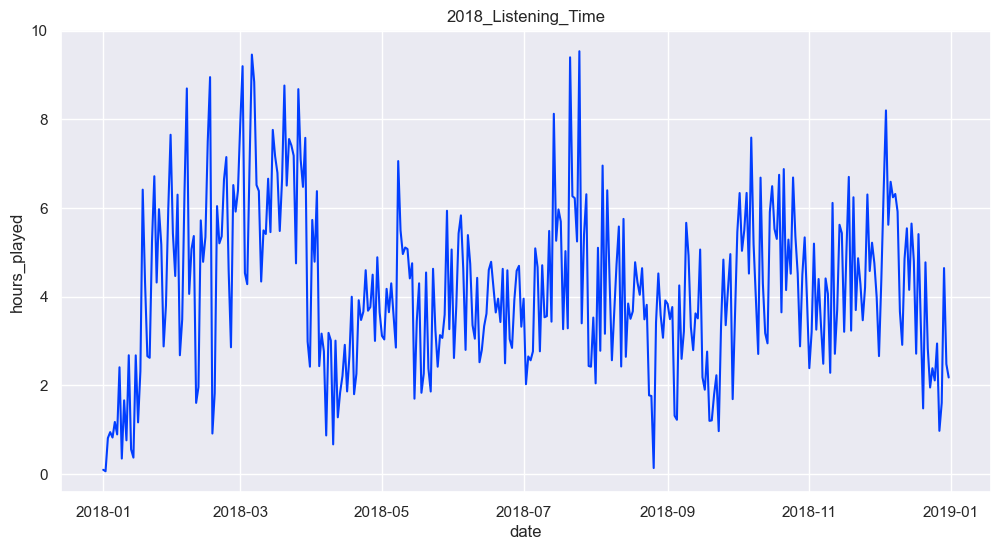

In [55]:
plot_2018 = sns.lineplot(x='date', y='hours_played', data=dfs['2018'])
plot_2018.set_title('2018_Listening_Time')

Text(0.5, 1.0, '2023_Listening_Time')

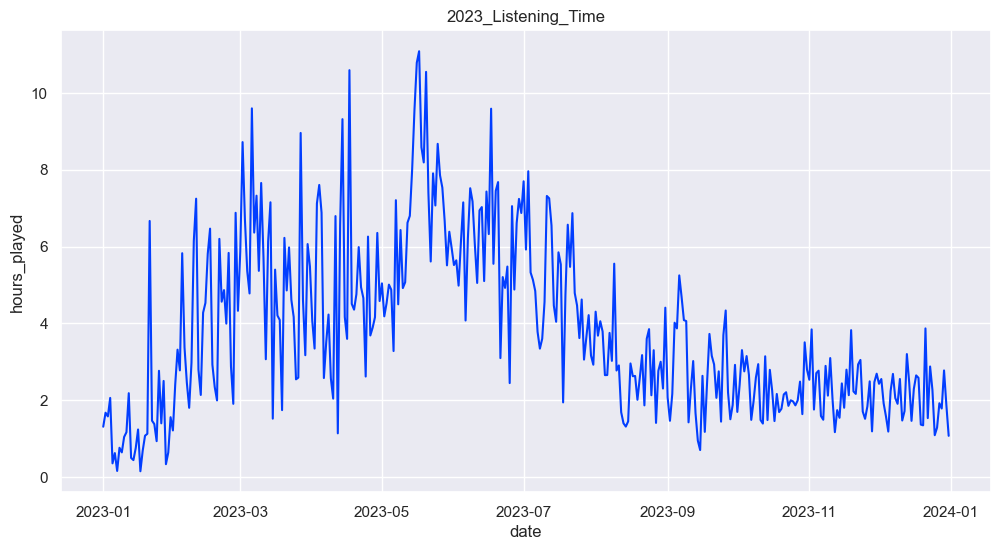

In [56]:
plot_2023 = sns.lineplot(x='date', y='hours_played', data=dfs['2023'])
plot_2023.set_title('2023_Listening_Time')